In [1]:
from GaussianProcesses import *


import warnings
warnings.simplefilter("error")
warnings.simplefilter("ignore", DeprecationWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", RuntimeWarning)
from tqdm import tqdm_notebook

%matplotlib inline

In [2]:
def f(X, *C, noise = 0.02):
    c1,c2,c3,c4 = C
    return -c1*np.sin(c2*X) - X**2 + c4*X + noise*np.random.randn(*X.shape)


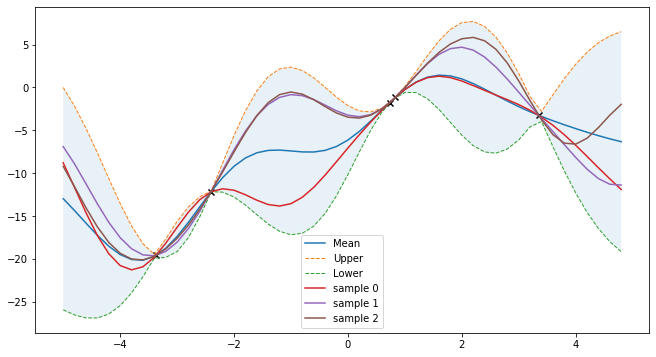

In [3]:
def nan_checker(covariance_matrix):
    diag_part = np.diag(covariance_matrix)
    diag_part_copy = diag_part.copy()
    diag_part_copy[diag_part < 0] = 0
    diag_part = diag_part_copy
    std = np.sqrt(diag_part)
    return std

def plot(mu_s, cov_s, X, X_train, Y_train):
    plt.figure(figsize=(11,6))
    samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)

    std = nan_checker(cov_s)
    
    uncertainty = (1.96 * std).ravel()
    upper,lower = mu_s.ravel()+uncertainty,mu_s.ravel()-uncertainty


    plt.plot(X, mu_s, label = 'Mean')
    plt.plot(X, upper,label='Upper',lw=1, ls='--')
    plt.plot(X, lower,label='Lower',lw=1, ls='--')

    plt.fill_between(X.flatten(), upper, lower, alpha=0.1)

    for i,sample in enumerate(samples):
        plt.plot(X, sample, label = 'sample '+str(i))
    plt.scatter(X_train.flatten(), Y_train.flatten(),marker = 'x', color = 'black',  linewidths=30)
    plt.legend()
    plt.show()
    return samples, std, uncertainty, upper, lower
    
kernel = SquareExponential()

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)

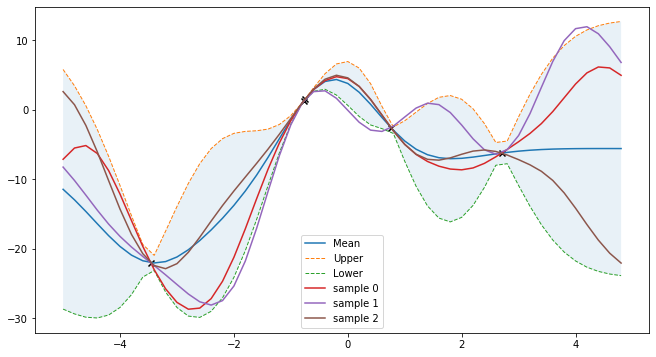

In [4]:
kernel = RationalQuadraticKernel()

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
    
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)

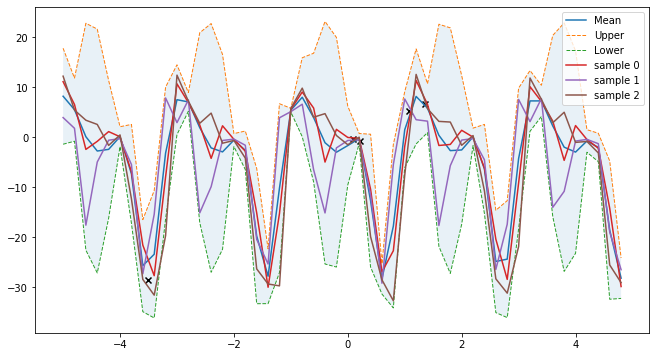

In [6]:
kernel = PeriodicKernel()
X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
c1, c2, c3, c4 = np.random.uniform(2,5,4)
Y = f(X,c1,c2,c3,c4)
Y_train = f(X_train, c1, c2,c3,c4)


gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, cov_s = gpr.predict(X, return_cov = True)
    
samples, std, uncertainty, upper, lower = plot(mu_s, cov_s, X, X_train, Y_train)


In [7]:
# 2D plot

In [8]:
p = 3
noise = 0.1
X_train = np.random.uniform(-4, 4, (100, p))
Y_train = 0.5*np.linalg.norm(X_train, axis = 1) + noise*np.random.randn(len(X_train))

X = np.random.uniform(-4, 4, (10, p))

kernel = SquareExponential()
gpr = GuassianProcessRegression(kernel)
gpr.fit(X_train, Y_train)
mu_s, std_s = gpr.predict(X, return_std = True)

In [9]:
mu_s

array([1.61117931, 1.96708996, 1.88297687, 1.45147488, 2.61929765,
       1.77329942, 1.97092445, 2.33266864, 1.82673521, 1.21820244])

In [10]:
std_s

array([0.4765616 , 0.49189276, 0.45376939, 0.17170668, 0.240736  ,
       0.35107309, 0.45882413, 0.34884172, 0.31856716, 0.24660079])

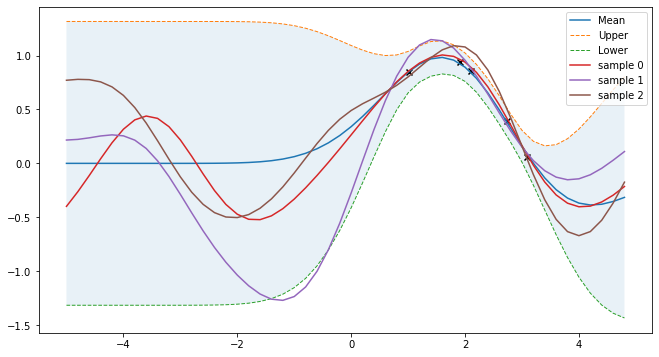

(array([[-0.39897634, -0.26259451, -0.11283089,  0.04263798,  0.19111093,
          0.31669951,  0.40348193,  0.43903885,  0.41735441,  0.3403328 ,
          0.21764407,  0.06506901, -0.09818104, -0.25256931, -0.38117309,
         -0.47194919, -0.51894324, -0.52225101, -0.48680909, -0.42038698,
         -0.3313791 , -0.22703159, -0.11254612,  0.00885072,  0.13514345,
          0.26454849,  0.39476824,  0.52270571,  0.64458081,  0.7561982 ,
          0.85310565,  0.93054217,  0.98329921,  1.00577811,  0.99251276,
          0.93924208,  0.84433682,  0.71015138,  0.54379447,  0.35693698,
          0.16455232, -0.01719712, -0.17345662, -0.29297106, -0.36961949,
         -0.40281654, -0.39669422, -0.35830922, -0.29543453, -0.21465315],
        [ 0.216187  ,  0.2224622 ,  0.2367653 ,  0.25411918,  0.26443684,
          0.25528566,  0.21544479,  0.13822144,  0.02349165, -0.12220372,
         -0.28752039, -0.45942638, -0.62639433, -0.78049453, -0.91770564,
         -1.03653816, -1.13575098, -1

In [11]:
#eyeball comparison with sklearns implementation

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

X = np.arange(-5,5, 0.2).reshape(-1, 1)
X_train = np.random.uniform(-4,4,(1,5)).reshape(-1, 1)
Y_train = np.sin(X_train)

rbf = ConstantKernel(1.0) * RBF(length_scale=1.0)
gpr = GPR(kernel=rbf, alpha=noise**2)

gpr.fit(X_train, Y_train)

mu_s, cov_s = gpr.predict(X, return_cov=True)


l = gpr.kernel_.k2.get_params()['length_scale']
sigma_f = np.sqrt(gpr.kernel_.k1.get_params()['constant_value'])

plot(mu_s, cov_s, X, X_train, Y_train)
